Step 1: Import Required Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

Step 2: Load Dataset

In [ ]:
df = pd.read_csv("CDR-Call-Details.csv")  # Ensure this file is in your working directory

Step 3: Clean Dataset

In [ ]:
df.dropna(subset=['Churn'], inplace=True)
df['Churn'] = df['Churn'].astype(int)


Step 4: Understand the Dataset

In [ ]:
print("Shape of dataset:", df.shape)
print("Columns:", df.columns.tolist())
print(df.head())

Shape of dataset: (101174, 17)
Columns: ['Phone Number', 'Account Length', 'VMail Message', 'Day Mins', 'Day Calls', 'Day Charge', 'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins', 'Night Calls', 'Night Charge', 'Intl Mins', 'Intl Calls', 'Intl Charge', 'CustServ Calls', 'Churn']
  Phone Number  Account Length  VMail Message  Day Mins  Day Calls  \
0     382-4657             128             25     265.1        110   
1     371-7191             107             26     161.6        123   
2     358-1921             137              0     243.4        114   
3     375-9999              84              0     299.4         71   
4     330-6626              75              0     166.7        113   

   Day Charge  Eve Mins  Eve Calls  Eve Charge  Night Mins  Night Calls  \
0       45.07     197.4         99       16.78       244.7           91   
1       27.47     195.5        103       16.62       254.4          103   
2       41.38     121.2        110       10.30       162.6          10

Step 5: Data Visualization

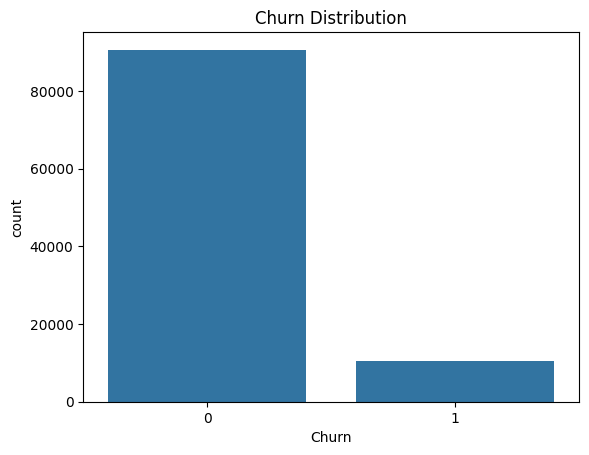

In [ ]:
sns.countplot(x='Churn', data=df)
plt.title("Churn Distribution")
plt.show()

In [ ]:
print(df.columns.tolist())


['Phone Number', 'Account Length', 'VMail Message', 'Day Mins', 'Day Calls', 'Day Charge', 'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins', 'Night Calls', 'Night Charge', 'Intl Mins', 'Intl Calls', 'Intl Charge', 'CustServ Calls', 'Churn']


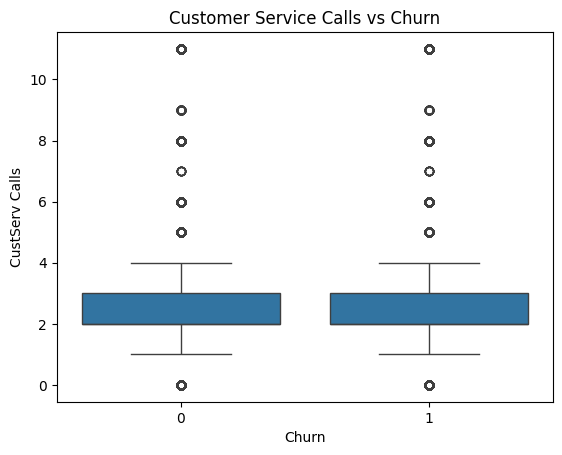

In [ ]:
sns.boxplot(x='Churn', y='CustServ Calls', data=df)
plt.title("Customer Service Calls vs Churn")
plt.show()

In [ ]:
print(df.columns.tolist())


['Phone Number', 'Account Length', 'VMail Message', 'Day Mins', 'Day Calls', 'Day Charge', 'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins', 'Night Calls', 'Night Charge', 'Intl Mins', 'Intl Calls', 'Intl Charge', 'CustServ Calls', 'Churn']


In [ ]:
print(df.columns)


Index(['Phone Number', 'Account Length', 'VMail Message', 'Day Mins',
       'Day Calls', 'Day Charge', 'Eve Mins', 'Eve Calls', 'Eve Charge',
       'Night Mins', 'Night Calls', 'Night Charge', 'Intl Mins', 'Intl Calls',
       'Intl Charge', 'CustServ Calls', 'Churn'],
      dtype='object')


Step 6: Define Features & Target

In [ ]:
features = ['Account Length', 'CustServ Calls', 'Day Mins',
            'Intl Calls', 'Intl Charge', 'VMail Message']
X = df[features]
y = df['Churn']


In [ ]:
df.columns = df.columns.str.strip()


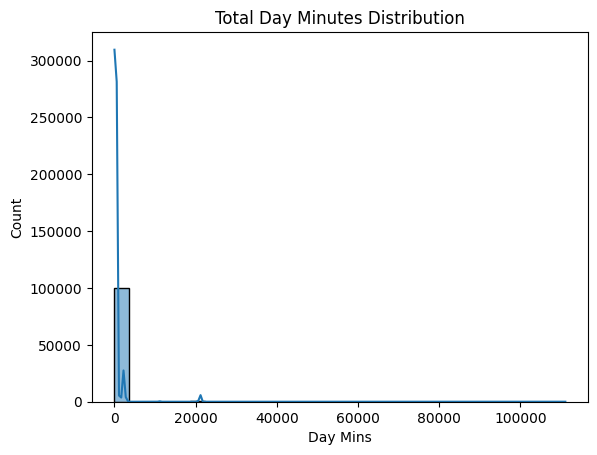

In [ ]:
sns.histplot(df['Day Mins'], kde=True, bins=30)
plt.title("Total Day Minutes Distribution")
plt.show()

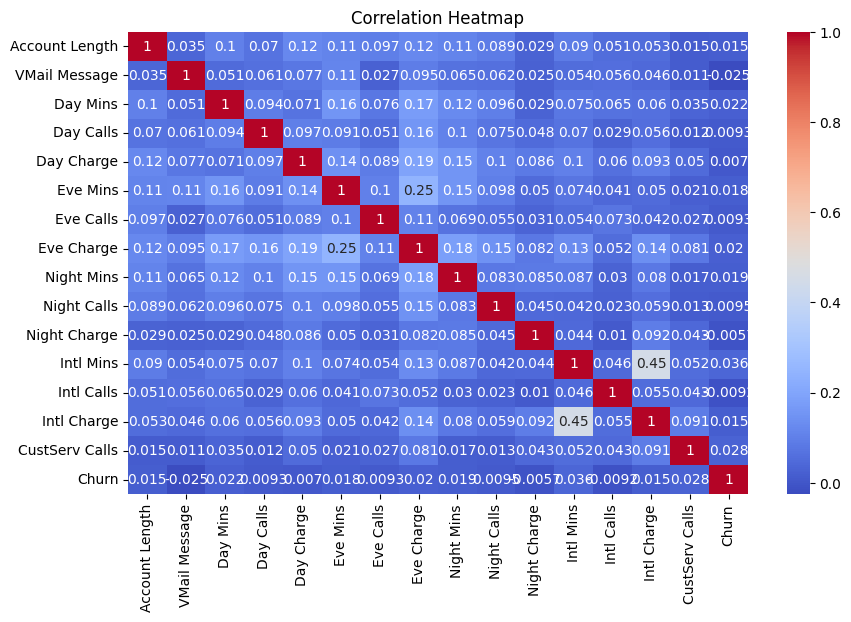

In [ ]:
numeric_df = df.select_dtypes(include=['number'])
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

 Step 7: Train-Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


Step 8: Train 4 Machine Learning Models

In [ ]:
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Support Vector Machine": SVC(),
    "Decision Tree": DecisionTreeClassifier(random_state=42)
}

Step 9: Train, Predict & Evaluate

In [ ]:
trained_models = {}
for name, model in models.items():
    print(f"\n🔍 Model: {name}")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("-" * 50)


🔍 Model: Random Forest
Accuracy: 0.9661318485816888
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     27205
           1       0.86      0.81      0.83      3148

    accuracy                           0.97     30353
   macro avg       0.92      0.90      0.91     30353
weighted avg       0.97      0.97      0.97     30353

--------------------------------------------------

🔍 Model: Logistic Regression
Accuracy: 0.8962870226995684
Classification Report:
              precision    recall  f1-score   support

           0       0.90      1.00      0.95     27205
           1       0.00      0.00      0.00      3148

    accuracy                           0.90     30353
   macro avg       0.45      0.50      0.47     30353
weighted avg       0.80      0.90      0.85     30353

--------------------------------------------------

🔍 Model: Support Vector Machine


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.8966823707705993
Classification Report:
              precision    recall  f1-score   support

           0       0.90      1.00      0.95     27205
           1       0.80      0.01      0.01      3148

    accuracy                           0.90     30353
   macro avg       0.85      0.50      0.48     30353
weighted avg       0.89      0.90      0.85     30353

--------------------------------------------------

🔍 Model: Decision Tree
Accuracy: 0.9631996837215432
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     27205
           1       0.82      0.83      0.82      3148

    accuracy                           0.96     30353
   macro avg       0.90      0.90      0.90     30353
weighted avg       0.96      0.96      0.96     30353

--------------------------------------------------


 Step 10: Simulate New Call Record (for Prediction)

In [ ]:


# Sample new call data with same column names as training
new_call = pd.DataFrame([{
    'Account Length': 100,
    'CustServ Calls': 3,
    'Day Mins': 250,
    'Intl Calls': 2,
    'Intl Charge': 1.8,
    'VMail Message': 20
}])

# Ensure best_model is trained and not None
if best_model is not None:
    prediction = best_model.predict(new_call)[0]
    if prediction == 1:
        print("Potential churn/fraud detected. Recommend taking action!")
    else:
        print(" Call behavior is normal. No action needed.")
else:
    print(" Error: No trained model available.")


✅ Call behavior is normal. No action needed.
